<a href="https://www.mbd.rwth-aachen.de/">
    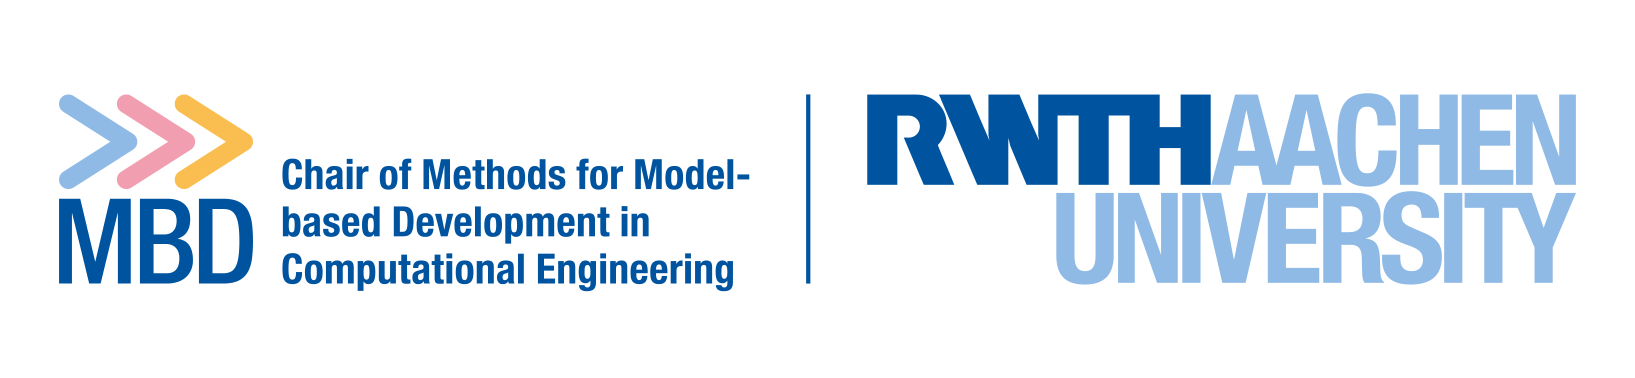
</a>
<a href="https://www.cpbl.rwth-aachen.de/">
    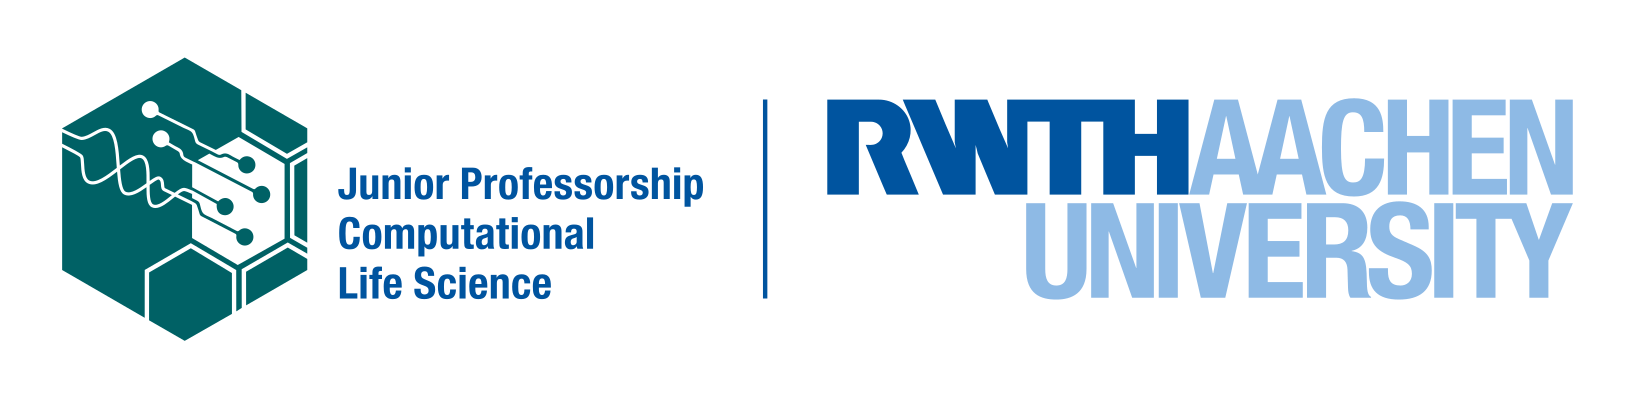
</a>

# Societal Challenges Datathon

Name: Vasu Hiteshi

Student number (Matrikelnummer): 484579


Cleaning the "Smoking data" by removing empty columns, adjusting negative values according to the variable and adjusting empty row values.

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data/smoking_household_smokers.csv')

# Get the column names
first_col = 'NumberOfPeopleSmokingInHome'
second_col = 'NumberOfPeopleSmokingInsideHome'

# Process the first column
# Convert to numeric, handling empty values
df[first_col] = pd.to_numeric(df[first_col], errors='coerce')

# Fill empty values with 0
df[first_col] = df[first_col].fillna(0)

# If value is very small (less than 0.5), make it 0
df[first_col] = df[first_col].apply(lambda x: 0 if x < 0.5 else x)

# Convert to integer
df[first_col] = df[first_col].astype(int)

# If first column is now zero, make the second column 0 too
df.loc[df[first_col] == 0, second_col] = 0

# Fill any remaining empty values in second column with 0
df[second_col] = pd.to_numeric(df[second_col], errors='coerce')
df[second_col] = df[second_col].fillna(0)
df[second_col] = df[second_col].astype(int)

# Save the processed CSV
df.to_csv('data/smoking_household_smokers.csv', index=False)

print("Processing complete!")
print(f"First column '{first_col}' statistics:")
print(df[first_col].describe())
print(f"\nSecond column '{second_col}' statistics:")
print(df[second_col].describe())

Processing complete!
First column 'NumberOfPeopleSmokingInHome' statistics:
count    11933.000000
mean         1.773904
std         34.778548
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        999.000000
Name: NumberOfPeopleSmokingInHome, dtype: float64

Second column 'NumberOfPeopleSmokingInsideHome' statistics:
count    11933.000000
mean         0.187380
std          9.151997
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        999.000000
Name: NumberOfPeopleSmokingInsideHome, dtype: float64


Cleaning of smoking_recent_tobacco_use



In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data/smoking_recent_tobacco_use.csv')

print("Original data shape:", df.shape)
print("\nOriginal data types:")
print(df.dtypes)

# Convert all columns to numeric first, handling empty values
for col in df.columns:
    if col != 'sequence_no':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Helper function to clean Yes/No columns (1 = Yes, 2 = No)
def clean_yes_no(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int in [1, 2]:
        return val_int
    else:
        return np.nan

# Helper function to clean days columns (0-5)
def clean_days_0_5(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return 0
    val_int = int(round(val))
    if 0 <= val_int <= 5:
        return val_int
    else:
        return np.nan

# Helper function to clean continuous values (reasonable range)
def clean_continuous(value, min_val=0, max_val=100):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return 0
    val_int = int(round(val))
    if min_val <= val_int <= max_val:
        return val_int
    else:
        return np.nan

# Clean columns based on codebook specifications
# Yes/No columns (1 = Yes, 2 = No)
yes_no_cols = [
    'TabaccoProduct_5Days',
    'UsedECigarettes_5Days',
    'UsedSmokelessTobacco_5Days',
    'UsedNicotineReplacement_5Days',
    'UsedAnyTobaccoProduct_5Days'
]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_yes_no)

# Days columns (0-5)
days_cols = [
    'DaysSmokedCigarettes_5Days',
    'NumberOfDaysUsedECigarettes_5Days',
    'NumberOfDaysSmokedPipe_5Days',
    'NumberOfDaysSmokedRegularCigars_5Days',
    'NumberOfDaysSmokedWaterPipeHookah_5Days'
]

for col in days_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_days_0_5)

# Continuous columns
if 'CigarettesSmokedPerSmokingDay_5Days' in df.columns:
    df['CigarettesSmokedPerSmokingDay_5Days'] = df['CigarettesSmokedPerSmokingDay_5Days'].apply(
        lambda x: clean_continuous(x, min_val=0, max_val=100)
    )

# ProductsUsed columns - typically categorical (1, 2, etc.), treat as Yes/No or small integers
products_cols = [col for col in df.columns if col.startswith('ProductsUsed_')]
for col in products_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_yes_no)

# LastCigaretteSmoked - likely categorical, treat as small integer (1-10 range)
if 'LastCigaretteSmoked' in df.columns:
    df['LastCigaretteSmoked'] = df['LastCigaretteSmoked'].apply(
        lambda x: clean_continuous(x, min_val=1, max_val=10) if not pd.isna(x) else np.nan
    )

# Convert sequence_no to integer
df['sequence_no'] = pd.to_numeric(df['sequence_no'], errors='coerce')
df['sequence_no'] = df['sequence_no'].fillna(0).astype(int)

# Convert all other columns to nullable integer type (Int64)
for col in df.columns:
    if col != 'sequence_no':
        df[col] = df[col].astype('Int64')

print("\n" + "="*50)
print("After cleaning smoking_recent_tobacco_use.csv:")
print("="*50)
print("\nData types after cleaning:")
print(df.dtypes)
print("\nSample of cleaned data:")
print(df.head(10))

# Save the cleaned CSV
df.to_csv('data/smoking_recent_tobacco_use.csv', index=False)
print("\nCleaned data saved to 'data/smoking_recent_tobacco_use.csv'")


Original data shape: (7199, 21)

Original data types:
sequence_no                                  int64
TabaccoProduct_5Days                       float64
ProductsUsed_1                             float64
DaysSmokedCigarettes_5Days                 float64
CigarettesSmokedPerSmokingDay_5Days        float64
LastCigaretteSmoked                        float64
ProductsUsed_2                             float64
NumberOfDaysSmokedPipe_5Days               float64
ProductsUsed_3                             float64
NumberOfDaysSmokedRegularCigars_5Days      float64
ProductsUsed_7                             float64
NumberOfDaysSmokedWaterPipeHookah_5Days    float64
UsedECigarettes_5Days                      float64
NumberOfDaysUsedECigarettes_5Days          float64
UsedSmokelessTobacco_5Days                 float64
ProductsUsed_4                             float64
ProductsUsed_5                             float64
ProductsUsed_8                             float64
UsedNicotineReplacement_5Day

Diabetes file cleaning



In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data/diabetes.csv')

print("Original data shape:", df.shape)
print("\nOriginal columns:", df.columns.tolist())
print("\nOriginal data types:")
print(df.dtypes)

# Check for empty column names and rename them
empty_cols = [i for i, col in enumerate(df.columns) if col == '' or pd.isna(col)]
if empty_cols:
    print(f"\nFound {len(empty_cols)} empty column name(s) at index(es): {empty_cols}")
    # Rename empty columns
    for idx in empty_cols:
        df.columns.values[idx] = f'Unnamed_{idx}'

# Convert all columns to numeric first, handling empty values
for col in df.columns:
    if col != 'sequence_no':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Helper function to clean Yes/No columns (1 = Yes, 2 = No)
def clean_yes_no(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int in [1, 2]:
        return val_int
    else:
        return np.nan

# Helper function to clean EverTold_Diabetes (1 = Yes, 2 = No, 3 = Borderline/Prediabetes)
def clean_ever_told_diabetes(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int in [1, 2, 3]:
        return val_int
    else:
        return np.nan

# Helper function to clean BloodSugarTest_Last3Years (1 = Yes, 2 = No, 9 = Don't know)
def clean_blood_sugar_test(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int in [1, 2, 9]:
        return val_int
    else:
        return np.nan

# Helper function to clean age (reasonable range 0-100)
def clean_age(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if 0 <= val_int <= 100:
        return val_int
    else:
        return np.nan

# Helper function to clean duration (reasonable range 0-100 years)
def clean_duration(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return 0
    val_int = int(round(val))
    if 0 <= val_int <= 100:
        return val_int
    else:
        return np.nan

# Clean EverTold_Diabetes (1, 2, or 3)
if 'EverTold_Diabetes' in df.columns:
    df['EverTold_Diabetes'] = df['EverTold_Diabetes'].apply(clean_ever_told_diabetes)

# Clean Age_DiabetesDiagnosis (continuous age)
if 'Age_DiabetesDiagnosis' in df.columns:
    df['Age_DiabetesDiagnosis'] = df['Age_DiabetesDiagnosis'].apply(clean_age)

# Clean EverTold_Prediabetes (1 = Yes, 2 = No)
if 'EverTold_Prediabetes' in df.columns:
    df['EverTold_Prediabetes'] = df['EverTold_Prediabetes'].apply(clean_yes_no)

# Clean BloodSugarTest_Last3Years (1, 2, or 9)
if 'BloodSugarTest_Last3Years' in df.columns:
    df['BloodSugarTest_Last3Years'] = df['BloodSugarTest_Last3Years'].apply(clean_blood_sugar_test)

# Clean CurrentlyTaking_Insulin (1 = Yes, 2 = No)
if 'CurrentlyTaking_Insulin' in df.columns:
    df['CurrentlyTaking_Insulin'] = df['CurrentlyTaking_Insulin'].apply(clean_yes_no)

# Clean InsulinDuration (continuous duration)
if 'InsulinDuration' in df.columns:
    df['InsulinDuration'] = df['InsulinDuration'].apply(clean_duration)

# Clean CurrentlyTaking_DiabeticPills (1 = Yes, 2 = No)
if 'CurrentlyTaking_DiabeticPills' in df.columns:
    df['CurrentlyTaking_DiabeticPills'] = df['CurrentlyTaking_DiabeticPills'].apply(clean_yes_no)

# Convert sequence_no to integer
df['sequence_no'] = pd.to_numeric(df['sequence_no'], errors='coerce')
df['sequence_no'] = df['sequence_no'].fillna(0).astype(int)

# Convert all other columns to nullable integer type (Int64)
for col in df.columns:
    if col != 'sequence_no':
        df[col] = df[col].astype('Int64')

print("\n" + "="*50)
print("After cleaning diabetes.csv:")
print("="*50)
print("\nData types after cleaning:")
print(df.dtypes)
print("\nUnique values in EverTold_Diabetes:")
print(df['EverTold_Diabetes'].value_counts(dropna=False))
print("\nUnique values in BloodSugarTest_Last3Years:")
print(df['BloodSugarTest_Last3Years'].value_counts(dropna=False))
print("\nSample of cleaned data:")
print(df.head(10))

# Save the cleaned CSV
df.to_csv('data/diabetes.csv', index=False)
print("\nCleaned data saved to 'data/diabetes.csv'")


Original data shape: (11744, 9)

Original columns: ['sequence_no', 'EverTold_Diabetes', 'Age_DiabetesDiagnosis', 'EverTold_Prediabetes', 'BloodSugarTest_Last3Years', 'CurrentlyTaking_Insulin', 'InsulinDuration', 'Unnamed: 7', 'CurrentlyTaking_DiabeticPills']

Original data types:
sequence_no                        int64
EverTold_Diabetes                float64
Age_DiabetesDiagnosis            float64
EverTold_Prediabetes             float64
BloodSugarTest_Last3Years        float64
CurrentlyTaking_Insulin          float64
InsulinDuration                  float64
Unnamed: 7                       float64
CurrentlyTaking_DiabeticPills    float64
dtype: object

After cleaning diabetes.csv:

Data types after cleaning:
sequence_no                      int64
EverTold_Diabetes                Int64
Age_DiabetesDiagnosis            Int64
EverTold_Prediabetes             Int64
BloodSugarTest_Last3Years        Int64
CurrentlyTaking_Insulin          Int64
InsulinDuration                  Int64
Unnam

Cleaning of smoking_ciggarette_use.csv

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('data/smoking_cigarette_use.csv')

print("Original data shape:", df.shape)
print("\nOriginal data types:")
print(df.dtypes)
print("\nUnique values in SmokingTypeMenthol before cleaning:")
print(df['SmokingTypeMenthol'].value_counts(dropna=False).head(20))

# Convert all columns to numeric first, handling empty values
for col in df.columns:
    if col != 'sequence_no':  # Keep sequence_no as is for now
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean SmokingTypeMenthol column - should only have 1 (Menthol) or 2 (Non-menthol)
# Handle outliers: very small values, values outside 1-2 range
def clean_smoking_type_menthol(value):
    if pd.isna(value):
        return np.nan
    # Convert to float first
    val = float(value)
    # If very small (like 5.397605346934028e-79), treat as missing
    if abs(val) < 0.5:
        return np.nan
    # Round to nearest integer
    val_int = int(round(val))
    # Only allow 1 or 2
    if val_int == 1:
        return 1
    elif val_int == 2:
        return 2
    else:
        # For any other value, treat as missing
        return np.nan

df['SmokingTypeMenthol'] = df['SmokingTypeMenthol'].apply(clean_smoking_type_menthol)

# Clean SmokedAtLeast100CigarettesInLife - should only have 1 (Yes) or 2 (No)
def clean_smoked_at_least_100(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int == 1:
        return 1
    elif val_int == 2:
        return 2
    else:
        return np.nan

df['SmokedAtLeast100CigarettesInLife'] = df['SmokedAtLeast100CigarettesInLife'].apply(clean_smoked_at_least_100)

# Clean CurrentCigaretteSmoking - should only have 1, 2, or 3
def clean_current_smoking(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int in [1, 2, 3]:
        return val_int
    else:
        return np.nan

df['CurrentCigaretteSmoking'] = df['CurrentCigaretteSmoking'].apply(clean_current_smoking)

# Clean CigarettesSmokedDays_30Days - should be 0-30
def clean_cigarettes_days(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return 0
    val_int = int(round(val))
    if 0 <= val_int <= 30:
        return val_int
    else:
        return np.nan

df['CigarettesSmokedDays_30Days'] = df['CigarettesSmokedDays_30Days'].apply(clean_cigarettes_days)

# Clean CigarettesPerDayOnSmokingDays_30Days - continuous, but should be reasonable
def clean_cigarettes_per_day(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return 0
    val_int = int(round(val))
    # Reasonable upper limit (e.g., 100 cigarettes per day)
    if 0 <= val_int <= 100:
        return val_int
    else:
        return np.nan

df['CigarettesPerDayOnSmokingDays_30Days'] = df['CigarettesPerDayOnSmokingDays_30Days'].apply(clean_cigarettes_per_day)

# Clean FirstCigaretteAge - continuous age, should be reasonable (e.g., 5-100)
def clean_first_cigarette_age(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if 5 <= val_int <= 100:
        return val_int
    else:
        return np.nan

df['FirstCigaretteAge'] = df['FirstCigaretteAge'].apply(clean_first_cigarette_age)

# Clean TotalCigarettesSmoked - continuous, should be reasonable
def clean_total_cigarettes(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return 0
    val_int = int(round(val))
    # Reasonable upper limit
    if 0 <= val_int <= 1000000:
        return val_int
    else:
        return np.nan

df['TotalCigarettesSmoked'] = df['TotalCigarettesSmoked'].apply(clean_total_cigarettes)

# Clean QuestionnaireModeFlag - should be 1 or 2
def clean_questionnaire_mode(value):
    if pd.isna(value):
        return np.nan
    val = float(value)
    if abs(val) < 0.5:
        return np.nan
    val_int = int(round(val))
    if val_int in [1, 2]:
        return val_int
    else:
        return np.nan

df['QuestionnaireModeFlag'] = df['QuestionnaireModeFlag'].apply(clean_questionnaire_mode)

# Convert sequence_no to integer
df['sequence_no'] = pd.to_numeric(df['sequence_no'], errors='coerce')
df['sequence_no'] = df['sequence_no'].fillna(0).astype(int)

# Convert all other columns to nullable integer type (Int64) to preserve NaN values
# but allow integer representation
for col in df.columns:
    if col != 'sequence_no':
        # Convert to Int64 (nullable integer)
        df[col] = df[col].astype('Int64')

print("\n" + "="*50)
print("After cleaning:")
print("="*50)
print("\nUnique values in SmokingTypeMenthol after cleaning:")
print(df['SmokingTypeMenthol'].value_counts(dropna=False))
print("\nUnique values in SmokedAtLeast100CigarettesInLife after cleaning:")
print(df['SmokedAtLeast100CigarettesInLife'].value_counts(dropna=False))
print("\nUnique values in CurrentCigaretteSmoking after cleaning:")
print(df['CurrentCigaretteSmoking'].value_counts(dropna=False))
print("\nData types after cleaning:")
print(df.dtypes)

# Save the cleaned CSV
df.to_csv('data/smoking_cigarette_use.csv', index=False)
print("\nCleaned data saved to 'data/smoking_cigarette_use.csv'")


Original data shape: (9015, 9)

Original data types:
sequence_no                             float64
SmokedAtLeast100CigarettesInLife        float64
CurrentCigaretteSmoking                 float64
CigarettesSmokedDays_30Days             float64
CigarettesPerDayOnSmokingDays_30Days    float64
SmokingTypeMenthol                      float64
TotalCigarettesSmoked                   float64
FirstCigaretteAge                       float64
QuestionnaireModeFlag                   float64
dtype: object

Unique values in SmokingTypeMenthol before cleaning:
SmokingTypeMenthol
NaN             7840
5.397605e-79     712
1.000000e+00     460
9.000000e+00       3
Name: count, dtype: int64

After cleaning:

Unique values in SmokingTypeMenthol after cleaning:
SmokingTypeMenthol
<NA>    8555
1        460
Name: count, dtype: Int64

Unique values in SmokedAtLeast100CigarettesInLife after cleaning:
SmokedAtLeast100CigarettesInLife
2       4878
1       3243
<NA>     894
Name: count, dtype: Int64

Unique valu

In [ ]:
# EDA 1: Load and merge all datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load datasets
diabetes_df = pd.read_csv('data/diabetes.csv')
smoking_cigarette_df = pd.read_csv('data/smoking_cigarette_use.csv')
smoking_household_df = pd.read_csv('data/smoking_household_smokers.csv')
smoking_recent_df = pd.read_csv('data/smoking_recent_tobacco_use.csv')

# Merge all datasets on sequence_no
df = diabetes_df.merge(smoking_cigarette_df, on='sequence_no', how='outer', suffixes=('', '_cig'))
df = df.merge(smoking_household_df, on='sequence_no', how='outer', suffixes=('', '_house'))
df = df.merge(smoking_recent_df, on='sequence_no', how='outer', suffixes=('', '_recent'))

print("Merged dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()


Merged dataset shape: (11933, 39)

Columns: ['sequence_no', 'EverTold_Diabetes', 'Age_DiabetesDiagnosis', 'EverTold_Prediabetes', 'BloodSugarTest_Last3Years', 'CurrentlyTaking_Insulin', 'InsulinDuration', 'Unnamed: 7', 'CurrentlyTaking_DiabeticPills', 'SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking', 'CigarettesSmokedDays_30Days', 'CigarettesPerDayOnSmokingDays_30Days', 'SmokingTypeMenthol', 'TotalCigarettesSmoked', 'FirstCigaretteAge', 'QuestionnaireModeFlag', 'NumberOfPeopleSmokingInHome', 'NumberOfPeopleSmokingInsideHome', 'TabaccoProduct_5Days', 'ProductsUsed_1', 'DaysSmokedCigarettes_5Days', 'CigarettesSmokedPerSmokingDay_5Days', 'LastCigaretteSmoked', 'ProductsUsed_2', 'NumberOfDaysSmokedPipe_5Days', 'ProductsUsed_3', 'NumberOfDaysSmokedRegularCigars_5Days', 'ProductsUsed_7', 'NumberOfDaysSmokedWaterPipeHookah_5Days', 'UsedECigarettes_5Days', 'NumberOfDaysUsedECigarettes_5Days', 'UsedSmokelessTobacco_5Days', 'ProductsUsed_4', 'ProductsUsed_5', 'ProductsUsed_8', 'Used

,sequence_no,EverTold_Diabetes,Age_DiabetesDiagnosis,EverTold_Prediabetes,BloodSugarTest_Last3Years,CurrentlyTaking_Insulin,InsulinDuration,Unnamed: 7,CurrentlyTaking_DiabeticPills,SmokedAtLeast100CigarettesInLife,...,NumberOfDaysSmokedWaterPipeHookah_5Days,UsedECigarettes_5Days,NumberOfDaysUsedECigarettes_5Days,UsedSmokelessTobacco_5Days,ProductsUsed_4,ProductsUsed_5,ProductsUsed_8,UsedNicotineReplacement_5Days,ProductsUsed_6,UsedAnyTobaccoProduct_5Days
0,130378.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0
2,130380.0,1.0,35.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,...,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0
3,130381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


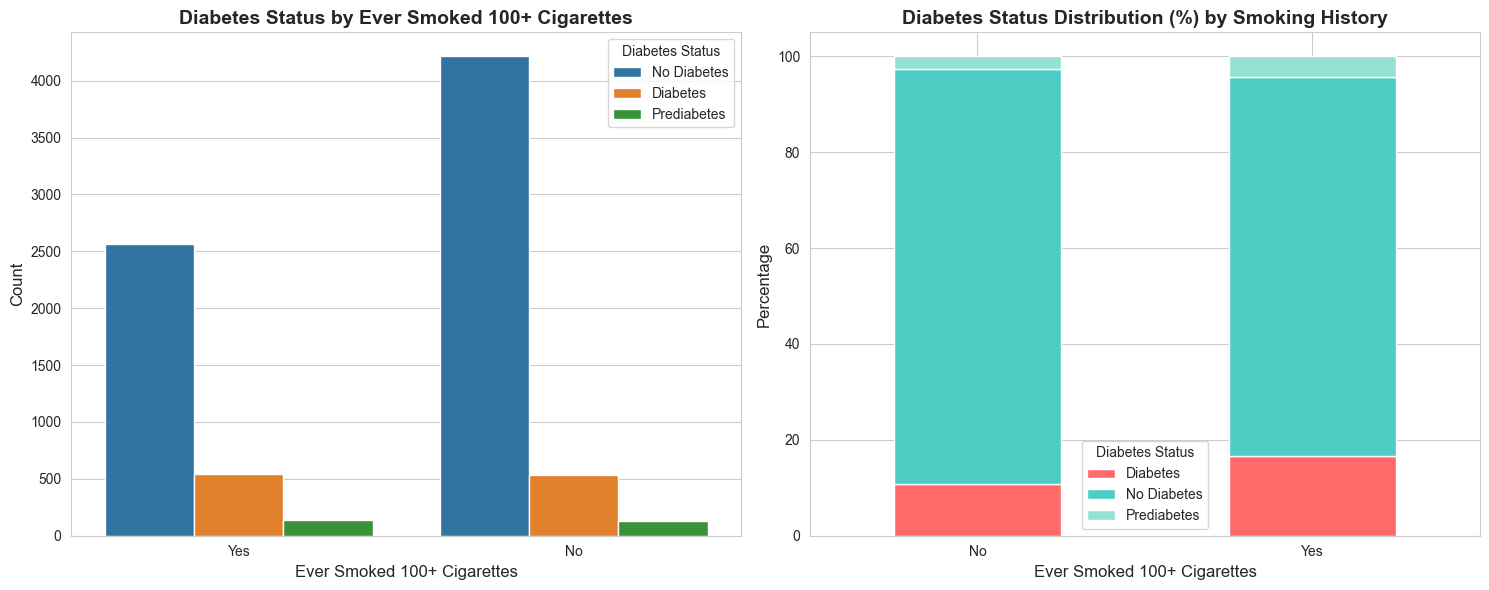


Diabetes Prevalence by Smoking History:
Diabetes_Status  Diabetes  No Diabetes  Prediabetes   All
Ever_Smoked_100                                          
No                    529         4215          133  4877
Yes                   541         2562          139  3242
All                  1070         6777          272  8119

Percentage breakdown:
Diabetes_Status   Diabetes  No Diabetes  Prediabetes
Ever_Smoked_100                                     
No               10.846832    86.426082     2.727086
Yes              16.687230    79.025293     4.287477


In [ ]:
# EDA 1: Diabetes Prevalence by Smoking Status (Ever Smoked 100+ Cigarettes)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create diabetes status column (combining diabetes and prediabetes)
df['Diabetes_Status'] = df['EverTold_Diabetes'].map({1: 'Diabetes', 2: 'No Diabetes', 3: 'Prediabetes'})
df['Ever_Smoked_100'] = df['SmokedAtLeast100CigarettesInLife'].map({1: 'Yes', 2: 'No'})

# Plot 1: Count plot
sns.countplot(data=df, x='Ever_Smoked_100', hue='Diabetes_Status', ax=axes[0])
axes[0].set_title('Diabetes Status by Ever Smoked 100+ Cigarettes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ever Smoked 100+ Cigarettes', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Diabetes Status')

# Plot 2: Percentage stacked bar
diab_smoke_cross = pd.crosstab(df['Ever_Smoked_100'], df['Diabetes_Status'], normalize='index') * 100
diab_smoke_cross.plot(kind='bar', stacked=True, ax=axes[1], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[1].set_title('Diabetes Status Distribution (%) by Smoking History', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ever Smoked 100+ Cigarettes', fontsize=12)
axes[1].set_ylabel('Percentage', fontsize=12)
axes[1].legend(title='Diabetes Status')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Calculate statistics
print("\n" + "="*60)
print("Diabetes Prevalence by Smoking History:")
print("="*60)
diab_smoke_stats = pd.crosstab(df['Ever_Smoked_100'], df['Diabetes_Status'], margins=True)
print(diab_smoke_stats)
print("\nPercentage breakdown:")
print(pd.crosstab(df['Ever_Smoked_100'], df['Diabetes_Status'], normalize='index') * 100)


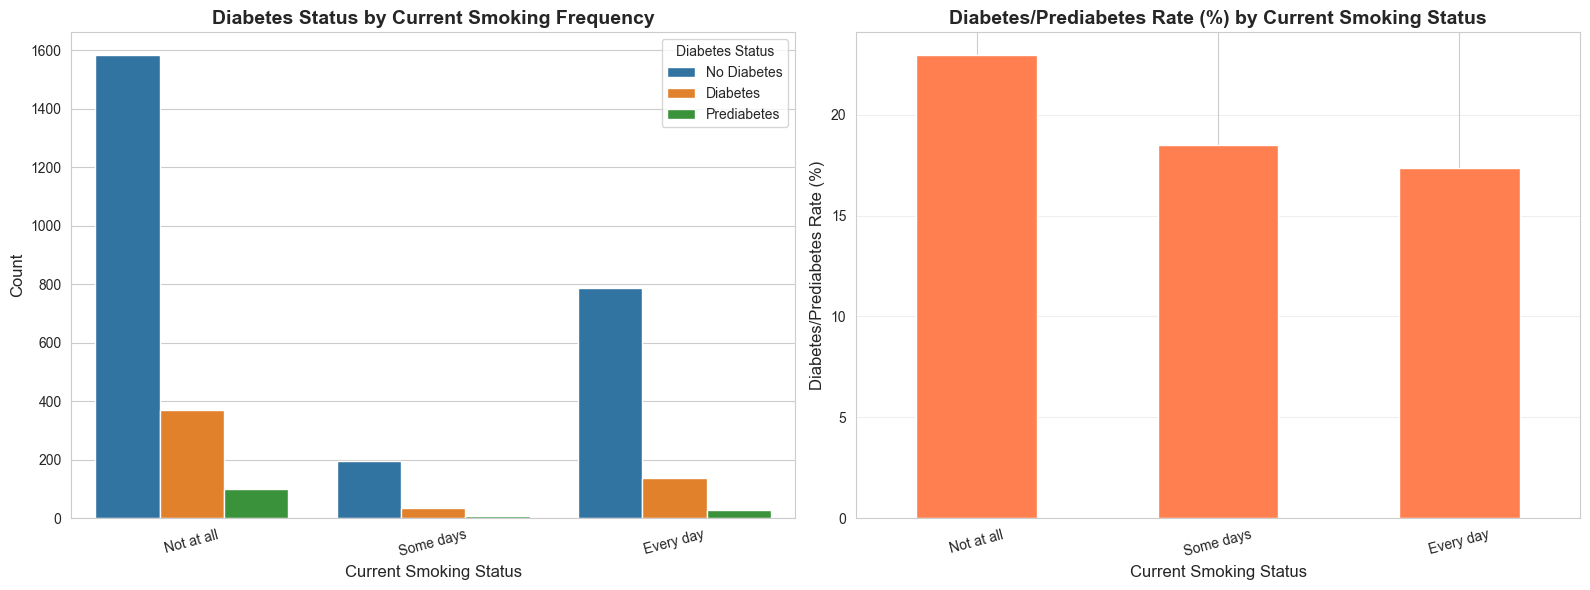


Diabetes Status by Current Smoking:
Diabetes_Status   Diabetes  No Diabetes  Prediabetes
Current_Smoking                                     
Every day        14.300736    82.649842     3.049422
Not at all       18.022406    77.057964     4.919630
Some days        14.705882    81.512605     3.781513

Diabetes/Prediabetes Rate by Smoking Status:
Not at all: 22.94%
Some days: 18.49%
Every day: 17.35%


In [ ]:
# EDA 2: Current Smoking Status vs Diabetes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create current smoking status
df['Current_Smoking'] = df['CurrentCigaretteSmoking'].map({
    1: 'Every day', 
    2: 'Some days', 
    3: 'Not at all'
})

# Filter out missing values
df_clean = df.dropna(subset=['Current_Smoking', 'Diabetes_Status'])

# Plot 1: Count plot
sns.countplot(data=df_clean, x='Current_Smoking', hue='Diabetes_Status', ax=axes[0], 
              order=['Not at all', 'Some days', 'Every day'])
axes[0].set_title('Diabetes Status by Current Smoking Frequency', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Current Smoking Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Diabetes Status')
axes[0].tick_params(axis='x', rotation=15)

# Plot 2: Diabetes rate by smoking status
diab_by_smoking = df_clean.groupby('Current_Smoking')['Diabetes_Status'].apply(
    lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100)
).sort_values(ascending=False)

diab_by_smoking.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Diabetes/Prediabetes Rate (%) by Current Smoking Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Current Smoking Status', fontsize=12)
axes[1].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\n" + "="*60)
print("Diabetes Status by Current Smoking:")
print("="*60)
print(pd.crosstab(df_clean['Current_Smoking'], df_clean['Diabetes_Status'], normalize='index') * 100)
print("\nDiabetes/Prediabetes Rate by Smoking Status:")
for status, rate in diab_by_smoking.items():
    print(f"{status}: {rate:.2f}%")


/var/folders/zp/gfdyts9j4vjcl4h612wybgcc0000gn/T/ipykernel_62661/2750578199.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diab_by_household = df_household.groupby('Household_Smokers_Category')['Diabetes_Status'].apply(


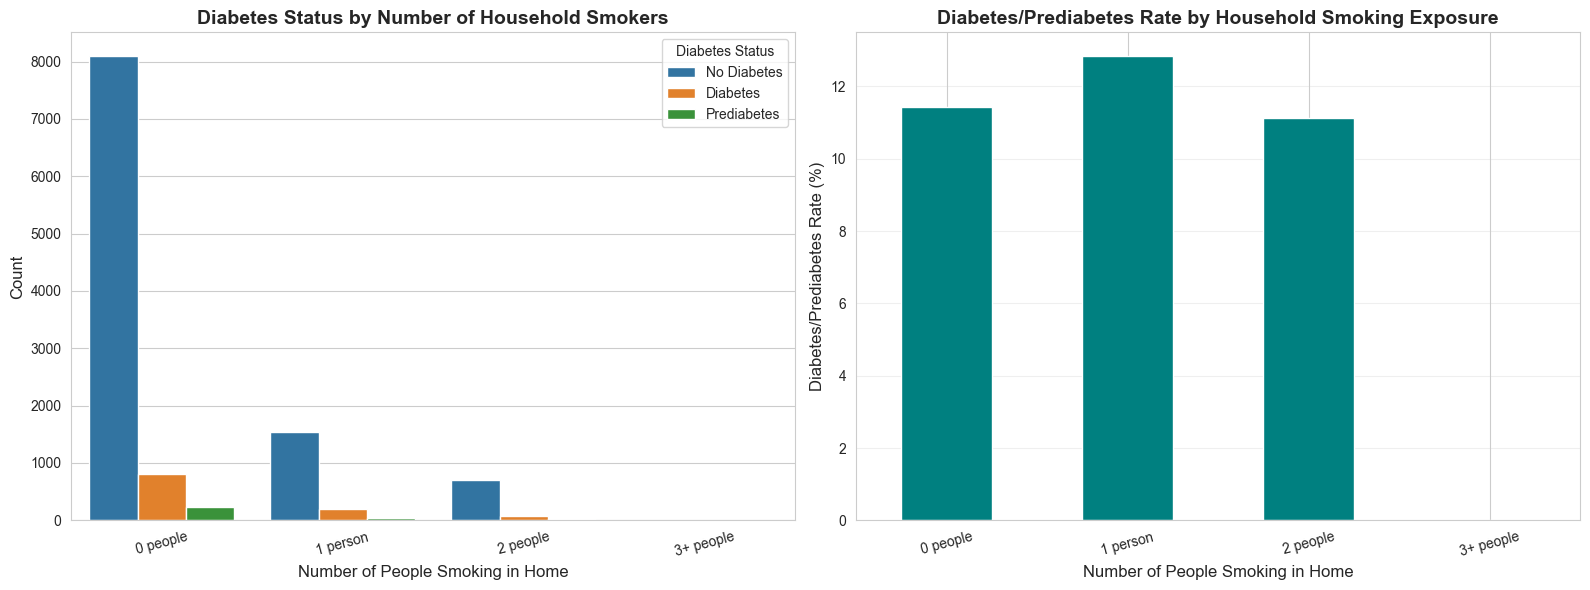


Diabetes Rate by Household Smoking Exposure:
0 people: 11.42% (n=9149)
1 person: 12.85% (n=1774)
2 people: 11.13% (n=791)
3+ people: 0.00% (n=0)


In [ ]:
# EDA 3: Household Smoking Exposure vs Diabetes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create household smoking exposure categories
df['Household_Smokers'] = df['NumberOfPeopleSmokingInHome']
df['Household_Smokers_Category'] = pd.cut(
    df['Household_Smokers'].fillna(0),
    bins=[-1, 0, 1, 2, 10],
    labels=['0 people', '1 person', '2 people', '3+ people']
)

df_household = df[df['Household_Smokers_Category'].notna() & df['Diabetes_Status'].notna()].copy()

# Plot 1: Count plot
sns.countplot(data=df_household, x='Household_Smokers_Category', hue='Diabetes_Status', ax=axes[0])
axes[0].set_title('Diabetes Status by Number of Household Smokers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of People Smoking in Home', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Diabetes Status')
axes[0].tick_params(axis='x', rotation=15)

# Plot 2: Diabetes rate by household smokers
diab_by_household = df_household.groupby('Household_Smokers_Category')['Diabetes_Status'].apply(
    lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
)

diab_by_household.plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Diabetes/Prediabetes Rate by Household Smoking Exposure', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of People Smoking in Home', fontsize=12)
axes[1].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\n" + "="*60)
print("Diabetes Rate by Household Smoking Exposure:")
print("="*60)
for category, rate in diab_by_household.items():
    count = len(df_household[df_household['Household_Smokers_Category'] == category])
    print(f"{category}: {rate:.2f}% (n={count})")


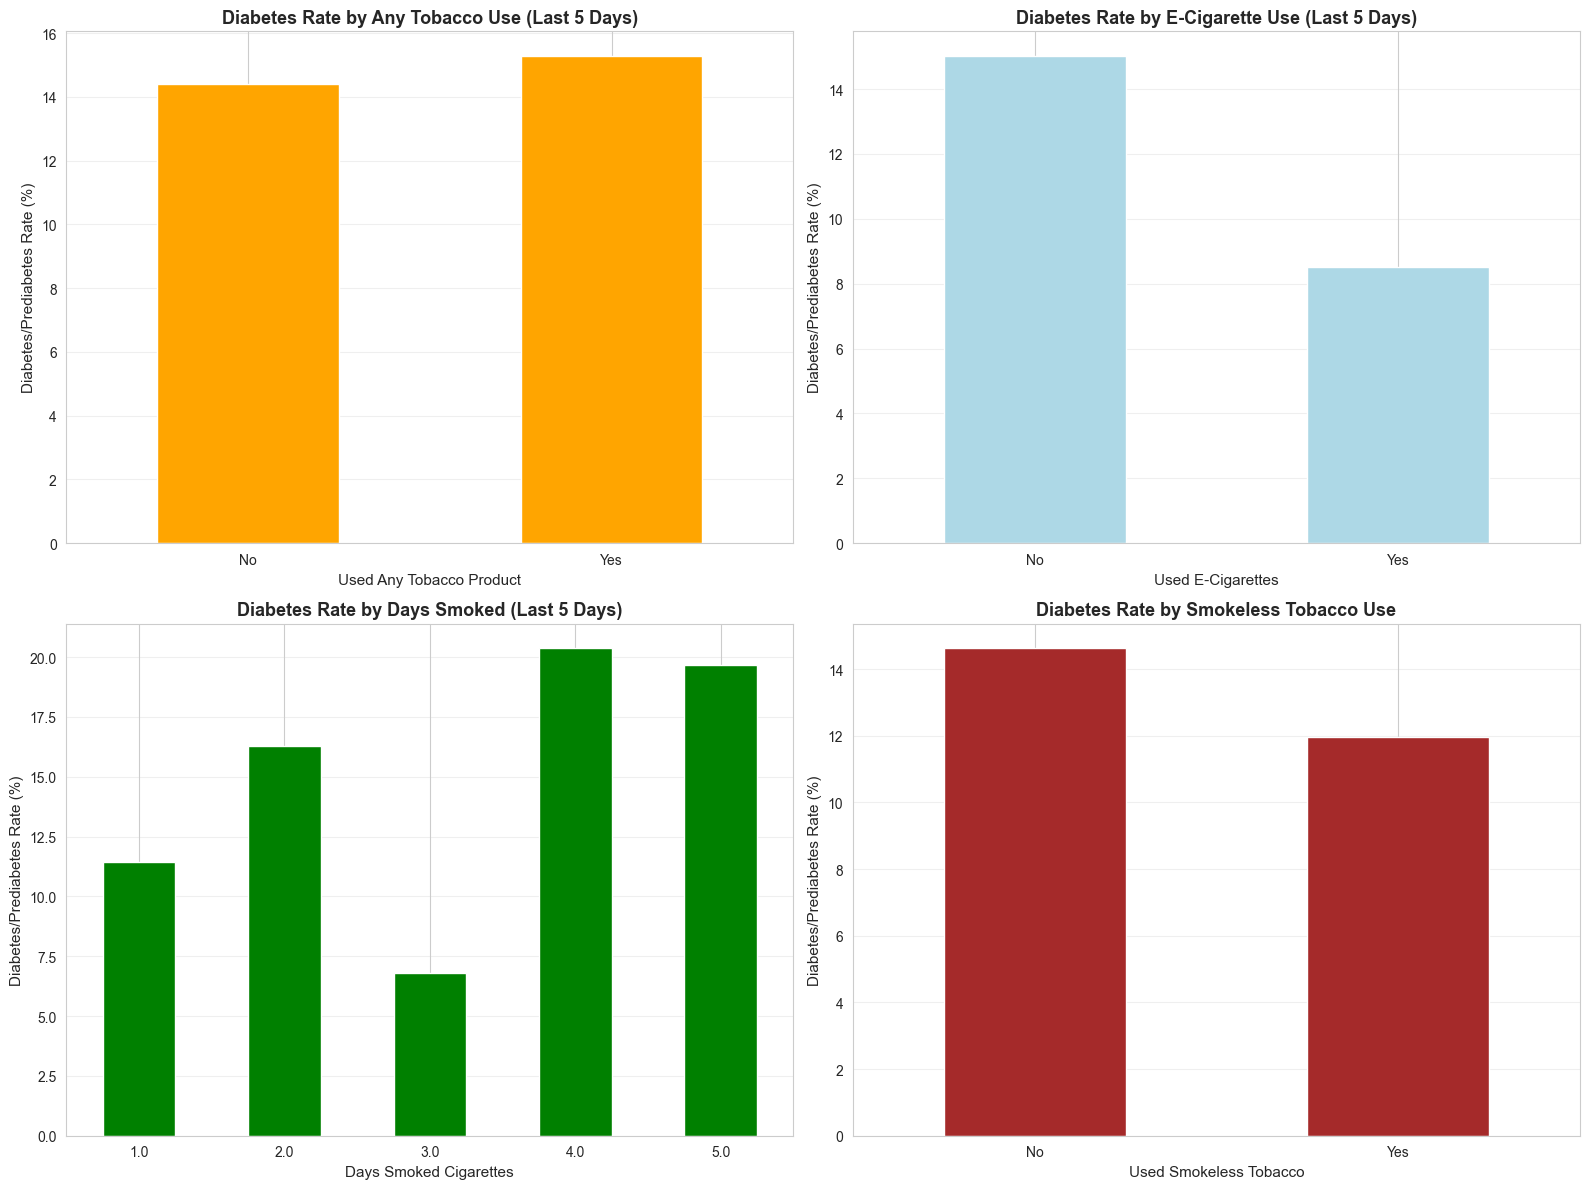


Recent Tobacco Use (Last 5 Days) vs Diabetes:

Any Tobacco Use:
  No: 14.41% (n=4968)
  Yes: 15.29% (n=1282)


In [ ]:
# EDA 4: Recent Tobacco Use (Last 5 Days) vs Diabetes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Create recent tobacco use indicators
df['Used_Any_Tobacco_5Days'] = df['UsedAnyTobaccoProduct_5Days'].map({1: 'Yes', 2: 'No'})
df['Used_E_Cigarettes_5Days'] = df['UsedECigarettes_5Days'].map({1: 'Yes', 2: 'No'})
df['Used_Smokeless_Tobacco_5Days'] = df['UsedSmokelessTobacco_5Days'].map({1: 'Yes', 2: 'No'})

# Filter for valid data
df_recent = df[df['Used_Any_Tobacco_5Days'].notna() & df['Diabetes_Status'].notna()].copy()

# Plot 1: Any tobacco use in last 5 days
if len(df_recent) > 0:
    diab_by_any_tobacco = df_recent.groupby('Used_Any_Tobacco_5Days')['Diabetes_Status'].apply(
        lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
    )
    diab_by_any_tobacco.plot(kind='bar', ax=axes[0,0], color='orange')
    axes[0,0].set_title('Diabetes Rate by Any Tobacco Use (Last 5 Days)', fontsize=13, fontweight='bold')
    axes[0,0].set_xlabel('Used Any Tobacco Product', fontsize=11)
    axes[0,0].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=11)
    axes[0,0].tick_params(axis='x', rotation=0)
    axes[0,0].grid(axis='y', alpha=0.3)

# Plot 2: E-cigarette use
df_e_cig = df[df['Used_E_Cigarettes_5Days'].notna() & df['Diabetes_Status'].notna()].copy()
if len(df_e_cig) > 0:
    diab_by_ecig = df_e_cig.groupby('Used_E_Cigarettes_5Days')['Diabetes_Status'].apply(
        lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
    )
    diab_by_ecig.plot(kind='bar', ax=axes[0,1], color='lightblue')
    axes[0,1].set_title('Diabetes Rate by E-Cigarette Use (Last 5 Days)', fontsize=13, fontweight='bold')
    axes[0,1].set_xlabel('Used E-Cigarettes', fontsize=11)
    axes[0,1].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=11)
    axes[0,1].tick_params(axis='x', rotation=0)
    axes[0,1].grid(axis='y', alpha=0.3)

# Plot 3: Days smoked cigarettes in last 5 days
df['Days_Smoked_5Days'] = df['DaysSmokedCigarettes_5Days']
df_days5 = df[df['Days_Smoked_5Days'].notna() & df['Diabetes_Status'].notna()].copy()
if len(df_days5) > 0:
    diab_by_days5 = df_days5.groupby('Days_Smoked_5Days')['Diabetes_Status'].apply(
        lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
    )
    diab_by_days5.plot(kind='bar', ax=axes[1,0], color='green')
    axes[1,0].set_title('Diabetes Rate by Days Smoked (Last 5 Days)', fontsize=13, fontweight='bold')
    axes[1,0].set_xlabel('Days Smoked Cigarettes', fontsize=11)
    axes[1,0].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=11)
    axes[1,0].tick_params(axis='x', rotation=0)
    axes[1,0].grid(axis='y', alpha=0.3)

# Plot 4: Smokeless tobacco use
df_smokeless = df[df['Used_Smokeless_Tobacco_5Days'].notna() & df['Diabetes_Status'].notna()].copy()
if len(df_smokeless) > 0:
    diab_by_smokeless = df_smokeless.groupby('Used_Smokeless_Tobacco_5Days')['Diabetes_Status'].apply(
        lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
    )
    diab_by_smokeless.plot(kind='bar', ax=axes[1,1], color='brown')
    axes[1,1].set_title('Diabetes Rate by Smokeless Tobacco Use', fontsize=13, fontweight='bold')
    axes[1,1].set_xlabel('Used Smokeless Tobacco', fontsize=11)
    axes[1,1].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=11)
    axes[1,1].tick_params(axis='x', rotation=0)
    axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\n" + "="*60)
print("Recent Tobacco Use (Last 5 Days) vs Diabetes:")
print("="*60)
if len(df_recent) > 0:
    print("\nAny Tobacco Use:")
    for use, rate in diab_by_any_tobacco.items():
        count = len(df_recent[df_recent['Used_Any_Tobacco_5Days'] == use])
        print(f"  {use}: {rate:.2f}% (n={count})")


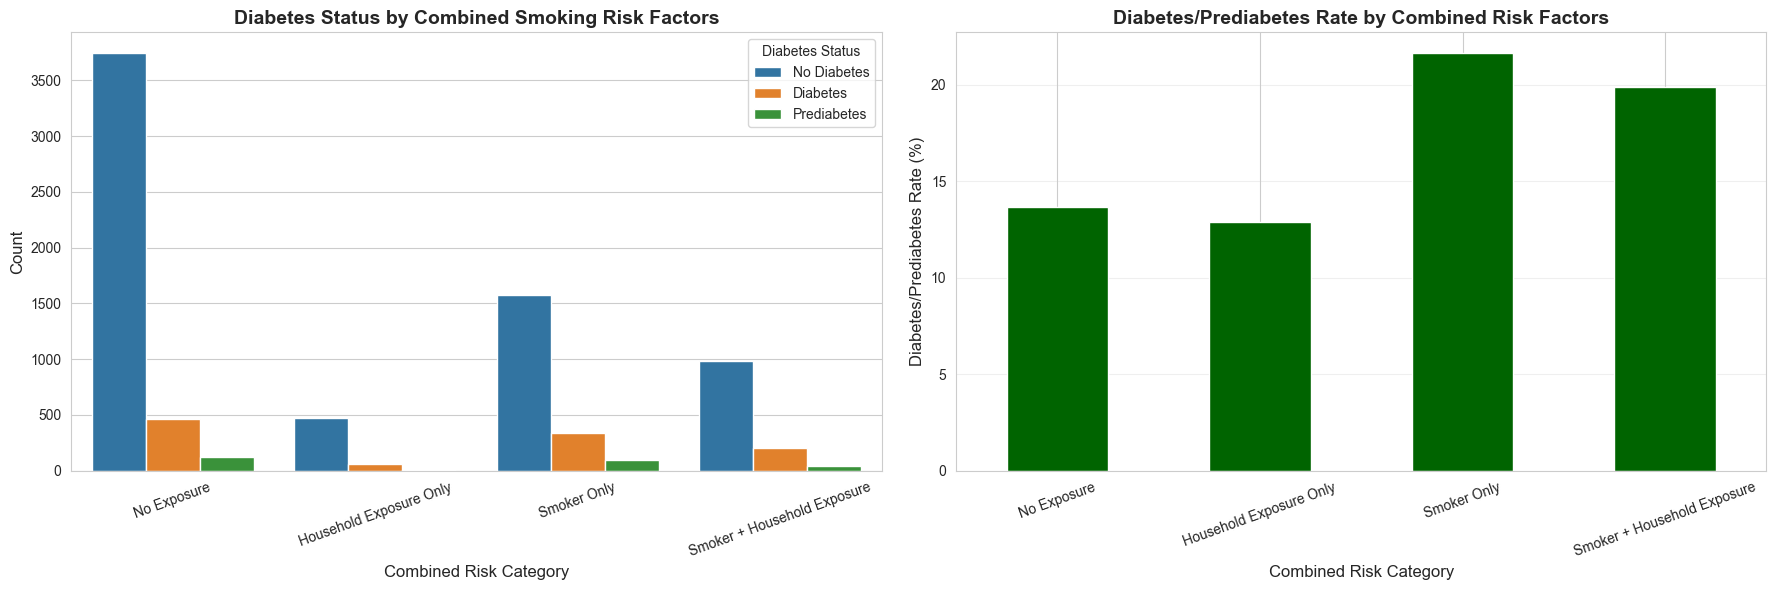


Diabetes Rate by Combined Risk Factors:
No Exposure: 13.66% (n=4335)
Household Exposure Only: 12.92% (n=542)
Smoker Only: 21.64% (n=2010)
Smoker + Household Exposure: 19.89% (n=1232)


In [ ]:
# EDA 5: Combined Risk Factors - Smoking Intensity + Household Exposure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Create combined risk factor
df['Combined_Risk'] = 'Low Risk'
df.loc[(df['Ever_Smoked_100'] == 'Yes') & (df['Household_Smokers'] > 0), 'Combined_Risk'] = 'Smoker + Household Exposure'
df.loc[(df['Ever_Smoked_100'] == 'Yes') & (df['Household_Smokers'] == 0), 'Combined_Risk'] = 'Smoker Only'
df.loc[(df['Ever_Smoked_100'] == 'No') & (df['Household_Smokers'] > 0), 'Combined_Risk'] = 'Household Exposure Only'
df.loc[(df['Ever_Smoked_100'] == 'No') & (df['Household_Smokers'] == 0), 'Combined_Risk'] = 'No Exposure'

df_combined = df[df['Combined_Risk'].notna() & df['Diabetes_Status'].notna()].copy()

# Plot 1: Count plot
sns.countplot(data=df_combined, x='Combined_Risk', hue='Diabetes_Status', ax=axes[0],
              order=['No Exposure', 'Household Exposure Only', 'Smoker Only', 'Smoker + Household Exposure'])
axes[0].set_title('Diabetes Status by Combined Smoking Risk Factors', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Combined Risk Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Diabetes Status')
axes[0].tick_params(axis='x', rotation=20)

# Plot 2: Diabetes rate by combined risk
diab_by_combined = df_combined.groupby('Combined_Risk')['Diabetes_Status'].apply(
    lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
).reindex(['No Exposure', 'Household Exposure Only', 'Smoker Only', 'Smoker + Household Exposure'])

diab_by_combined.plot(kind='bar', ax=axes[1], color='darkgreen')
axes[1].set_title('Diabetes/Prediabetes Rate by Combined Risk Factors', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Combined Risk Category', fontsize=12)
axes[1].set_ylabel('Diabetes/Prediabetes Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=20)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\n" + "="*60)
print("Diabetes Rate by Combined Risk Factors:")
print("="*60)
for risk, rate in diab_by_combined.items():
    count = len(df_combined[df_combined['Combined_Risk'] == risk])
    print(f"{risk}: {rate:.2f}% (n={count})")


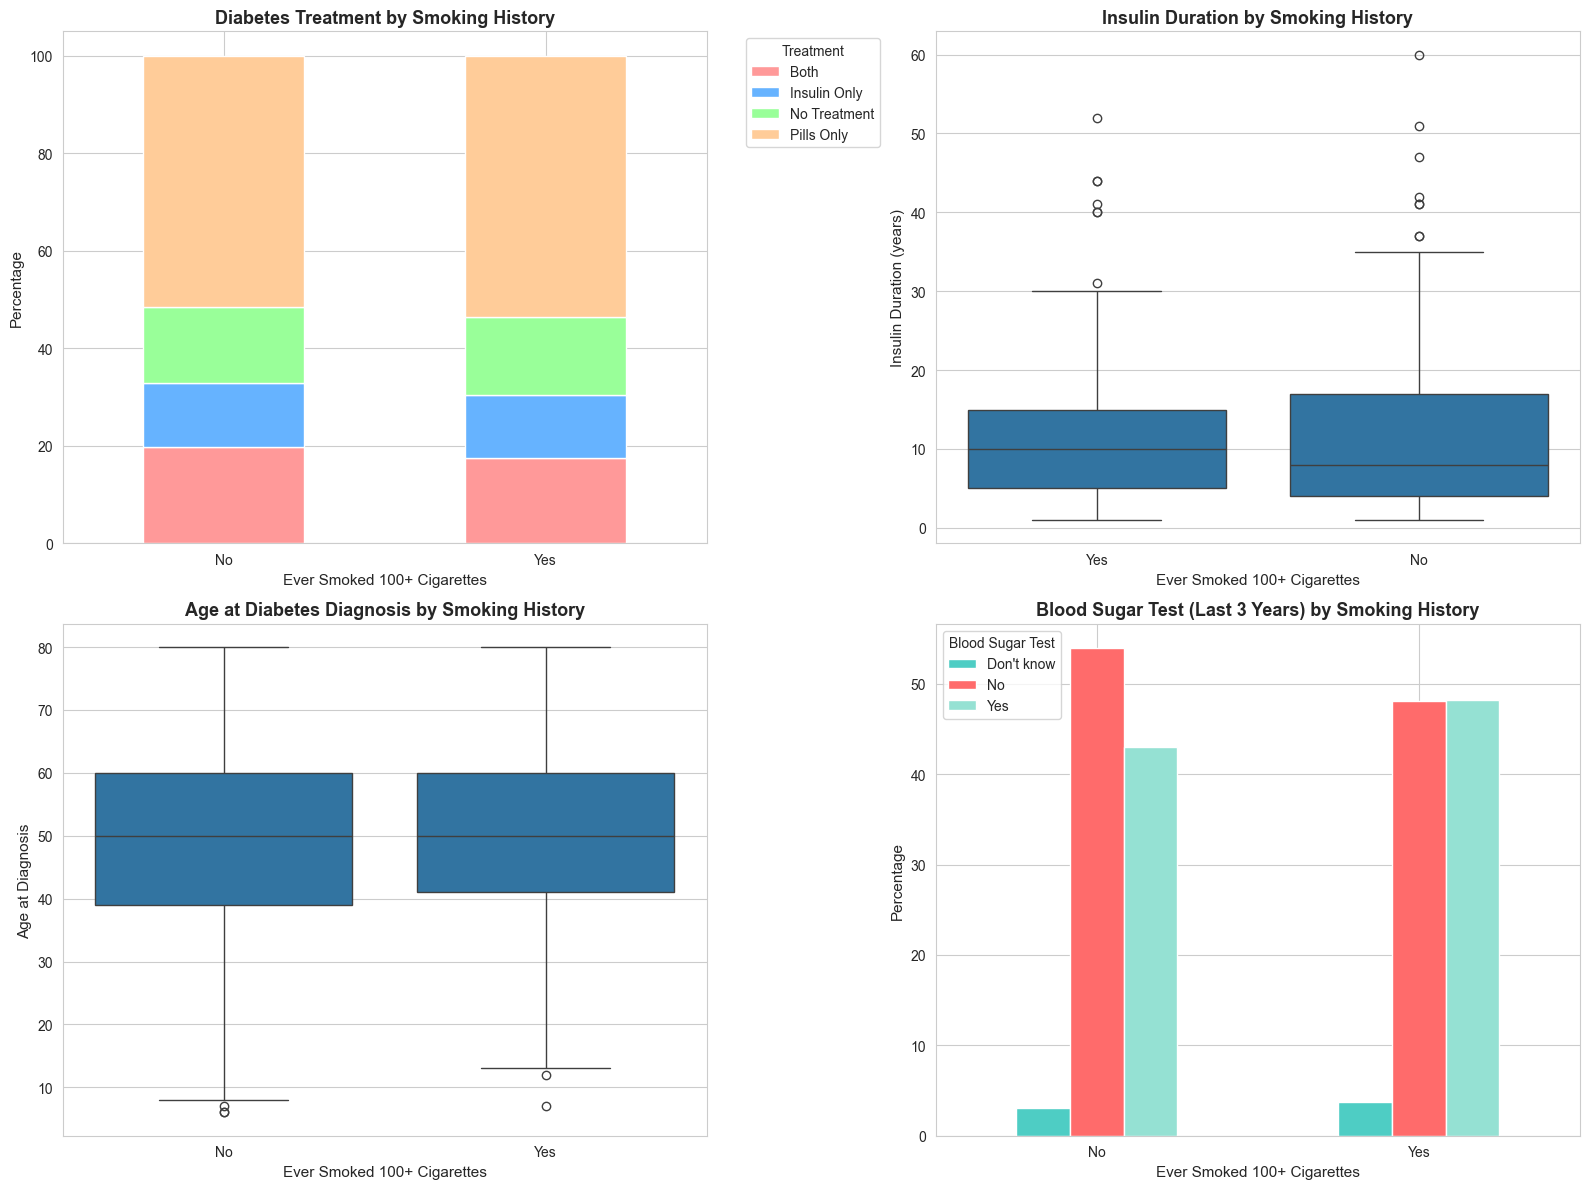


Diabetes Treatment by Smoking History:
Treatment_Status  Both  Insulin Only  No Treatment  Pills Only
Ever_Smoked_100                                               
No                 104            70            82         273
Yes                 95            70            86         290


In [ ]:
# EDA 6: Diabetes Treatment Status by Smoking History
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Create treatment indicators
df['Taking_Insulin'] = df['CurrentlyTaking_Insulin'].map({1: 'Yes', 2: 'No'})
df['Taking_Pills'] = df['CurrentlyTaking_DiabeticPills'].map({1: 'Yes', 2: 'No'})
df['Treatment_Status'] = 'No Treatment'
df.loc[(df['Taking_Insulin'] == 'Yes') & (df['Taking_Pills'] == 'Yes'), 'Treatment_Status'] = 'Both'
df.loc[(df['Taking_Insulin'] == 'Yes') & (df['Taking_Pills'] != 'Yes'), 'Treatment_Status'] = 'Insulin Only'
df.loc[(df['Taking_Insulin'] != 'Yes') & (df['Taking_Pills'] == 'Yes'), 'Treatment_Status'] = 'Pills Only'

# Filter for diabetics only
df_diabetics = df[df['EverTold_Diabetes'] == 1].copy()

# Plot 1: Treatment status by smoking history
df_diabetics_clean = df_diabetics[df_diabetics['Ever_Smoked_100'].notna() & 
                                   df_diabetics['Treatment_Status'].notna()].copy()
if len(df_diabetics_clean) > 0:
    treatment_by_smoking = pd.crosstab(df_diabetics_clean['Ever_Smoked_100'], 
                                        df_diabetics_clean['Treatment_Status'], 
                                        normalize='index') * 100
    treatment_by_smoking.plot(kind='bar', ax=axes[0,0], stacked=True, 
                              color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    axes[0,0].set_title('Diabetes Treatment by Smoking History', fontsize=13, fontweight='bold')
    axes[0,0].set_xlabel('Ever Smoked 100+ Cigarettes', fontsize=11)
    axes[0,0].set_ylabel('Percentage', fontsize=11)
    axes[0,0].legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,0].tick_params(axis='x', rotation=0)

# Plot 2: Insulin duration by smoking status
df_insulin = df_diabetics[(df_diabetics['Taking_Insulin'] == 'Yes') & 
                          (df_diabetics['InsulinDuration'].notna()) &
                          (df_diabetics['Ever_Smoked_100'].notna())].copy()
if len(df_insulin) > 0:
    sns.boxplot(data=df_insulin, x='Ever_Smoked_100', y='InsulinDuration', ax=axes[0,1])
    axes[0,1].set_title('Insulin Duration by Smoking History', fontsize=13, fontweight='bold')
    axes[0,1].set_xlabel('Ever Smoked 100+ Cigarettes', fontsize=11)
    axes[0,1].set_ylabel('Insulin Duration (years)', fontsize=11)
    axes[0,1].tick_params(axis='x', rotation=0)

# Plot 3: Age at diagnosis by smoking status
df_age_diag = df_diabetics[(df_diabetics['Age_DiabetesDiagnosis'].notna()) & 
                            (df_diabetics['Ever_Smoked_100'].notna())].copy()
if len(df_age_diag) > 0:
    sns.boxplot(data=df_age_diag, x='Ever_Smoked_100', y='Age_DiabetesDiagnosis', ax=axes[1,0])
    axes[1,0].set_title('Age at Diabetes Diagnosis by Smoking History', fontsize=13, fontweight='bold')
    axes[1,0].set_xlabel('Ever Smoked 100+ Cigarettes', fontsize=11)
    axes[1,0].set_ylabel('Age at Diagnosis', fontsize=11)
    axes[1,0].tick_params(axis='x', rotation=0)

# Plot 4: Blood sugar test by smoking status
df['Blood_Sugar_Test'] = df['BloodSugarTest_Last3Years'].map({1: 'Yes', 2: 'No', 9: "Don't know"})
df_test = df[df['Blood_Sugar_Test'].notna() & df['Ever_Smoked_100'].notna()].copy()
if len(df_test) > 0:
    test_by_smoking = pd.crosstab(df_test['Ever_Smoked_100'], df_test['Blood_Sugar_Test'], normalize='index') * 100
    test_by_smoking.plot(kind='bar', ax=axes[1,1], color=['#4ecdc4', '#ff6b6b', '#95e1d3'])
    axes[1,1].set_title('Blood Sugar Test (Last 3 Years) by Smoking History', fontsize=13, fontweight='bold')
    axes[1,1].set_xlabel('Ever Smoked 100+ Cigarettes', fontsize=11)
    axes[1,1].set_ylabel('Percentage', fontsize=11)
    axes[1,1].legend(title='Blood Sugar Test')
    axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Statistics
print("\n" + "="*60)
print("Diabetes Treatment by Smoking History:")
print("="*60)
if len(df_diabetics_clean) > 0:
    print(pd.crosstab(df_diabetics_clean['Ever_Smoked_100'], df_diabetics_clean['Treatment_Status']))


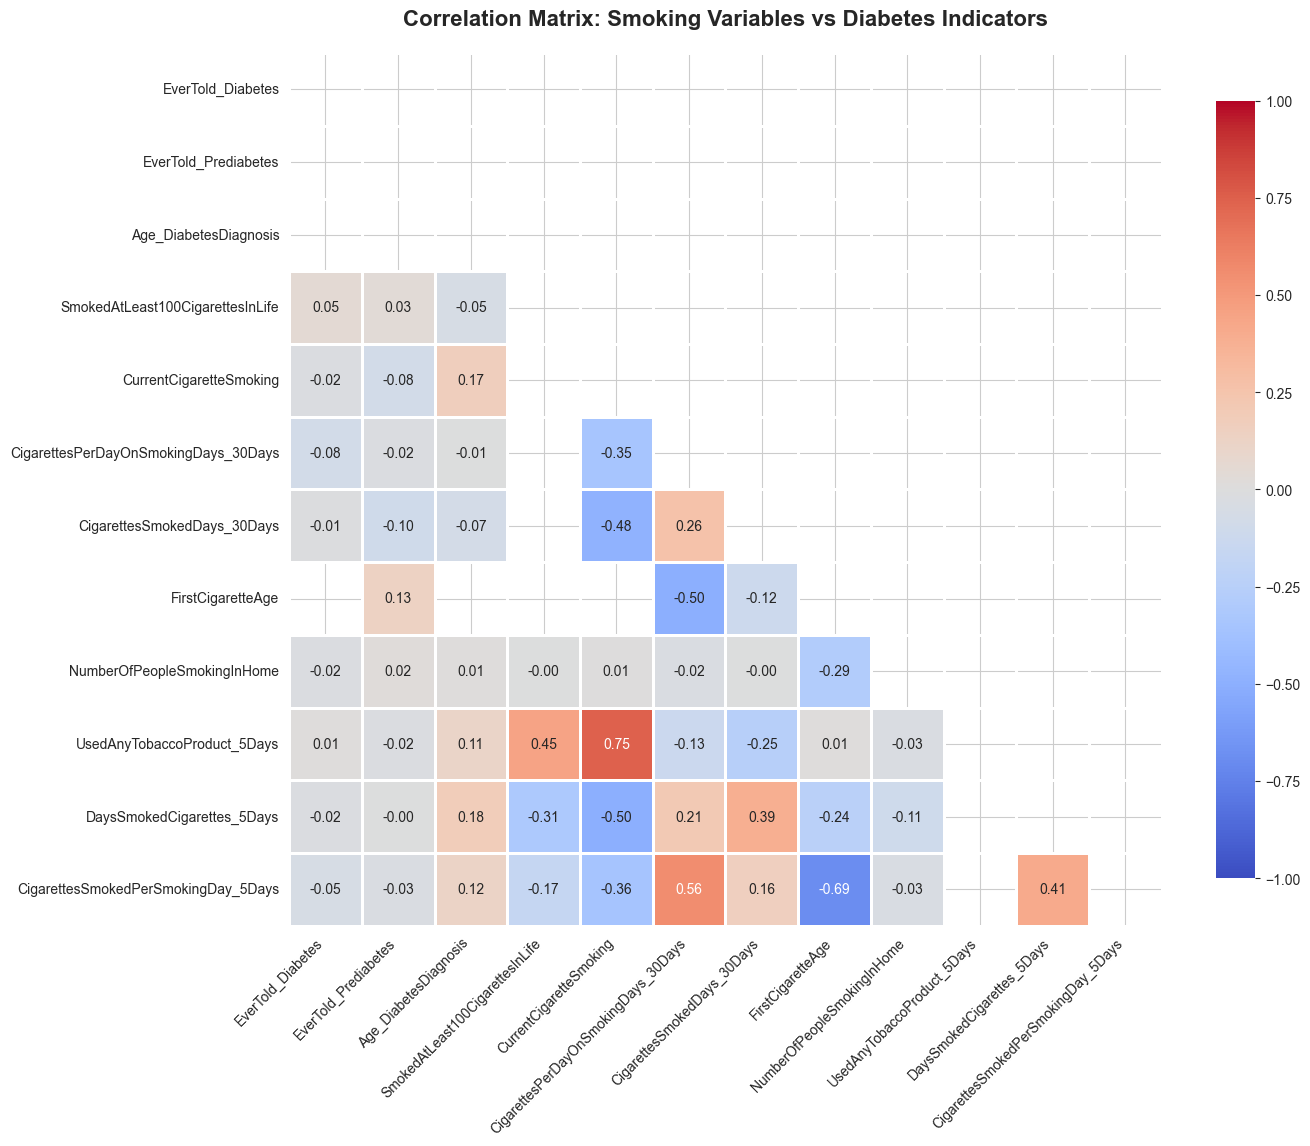


Strongest Correlations with Diabetes:
SmokedAtLeast100CigarettesInLife        0.053135
UsedAnyTobaccoProduct_5Days             0.009400
CigarettesSmokedDays_30Days            -0.007936
NumberOfPeopleSmokingInHome            -0.015719
DaysSmokedCigarettes_5Days             -0.018147
CurrentCigaretteSmoking                -0.019697
CigarettesSmokedPerSmokingDay_5Days    -0.051294
CigarettesPerDayOnSmokingDays_30Days   -0.082736
EverTold_Prediabetes                         NaN
Age_DiabetesDiagnosis                        NaN
Name: EverTold_Diabetes, dtype: float64


In [ ]:
# EDA 7: Correlation Heatmap - Smoking Variables vs Diabetes Indicators
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
corr_cols = [
    'EverTold_Diabetes',
    'EverTold_Prediabetes', 
    'Age_DiabetesDiagnosis',
    'SmokedAtLeast100CigarettesInLife',
    'CurrentCigaretteSmoking',
    'CigarettesPerDayOnSmokingDays_30Days',
    'CigarettesSmokedDays_30Days',
    'FirstCigaretteAge',
    'NumberOfPeopleSmokingInHome',
    'UsedAnyTobaccoProduct_5Days',
    'DaysSmokedCigarettes_5Days',
    'CigarettesSmokedPerSmokingDay_5Days'
]

# Create correlation matrix
df_corr = df[corr_cols].copy()
correlation_matrix = df_corr.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)

ax.set_title('Correlation Matrix: Smoking Variables vs Diabetes Indicators', 
             fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print strongest correlations with diabetes
print("\n" + "="*60)
print("Strongest Correlations with Diabetes:")
print("="*60)
diab_corr = correlation_matrix['EverTold_Diabetes'].sort_values(ascending=False)
print(diab_corr[diab_corr.index != 'EverTold_Diabetes'].head(10))


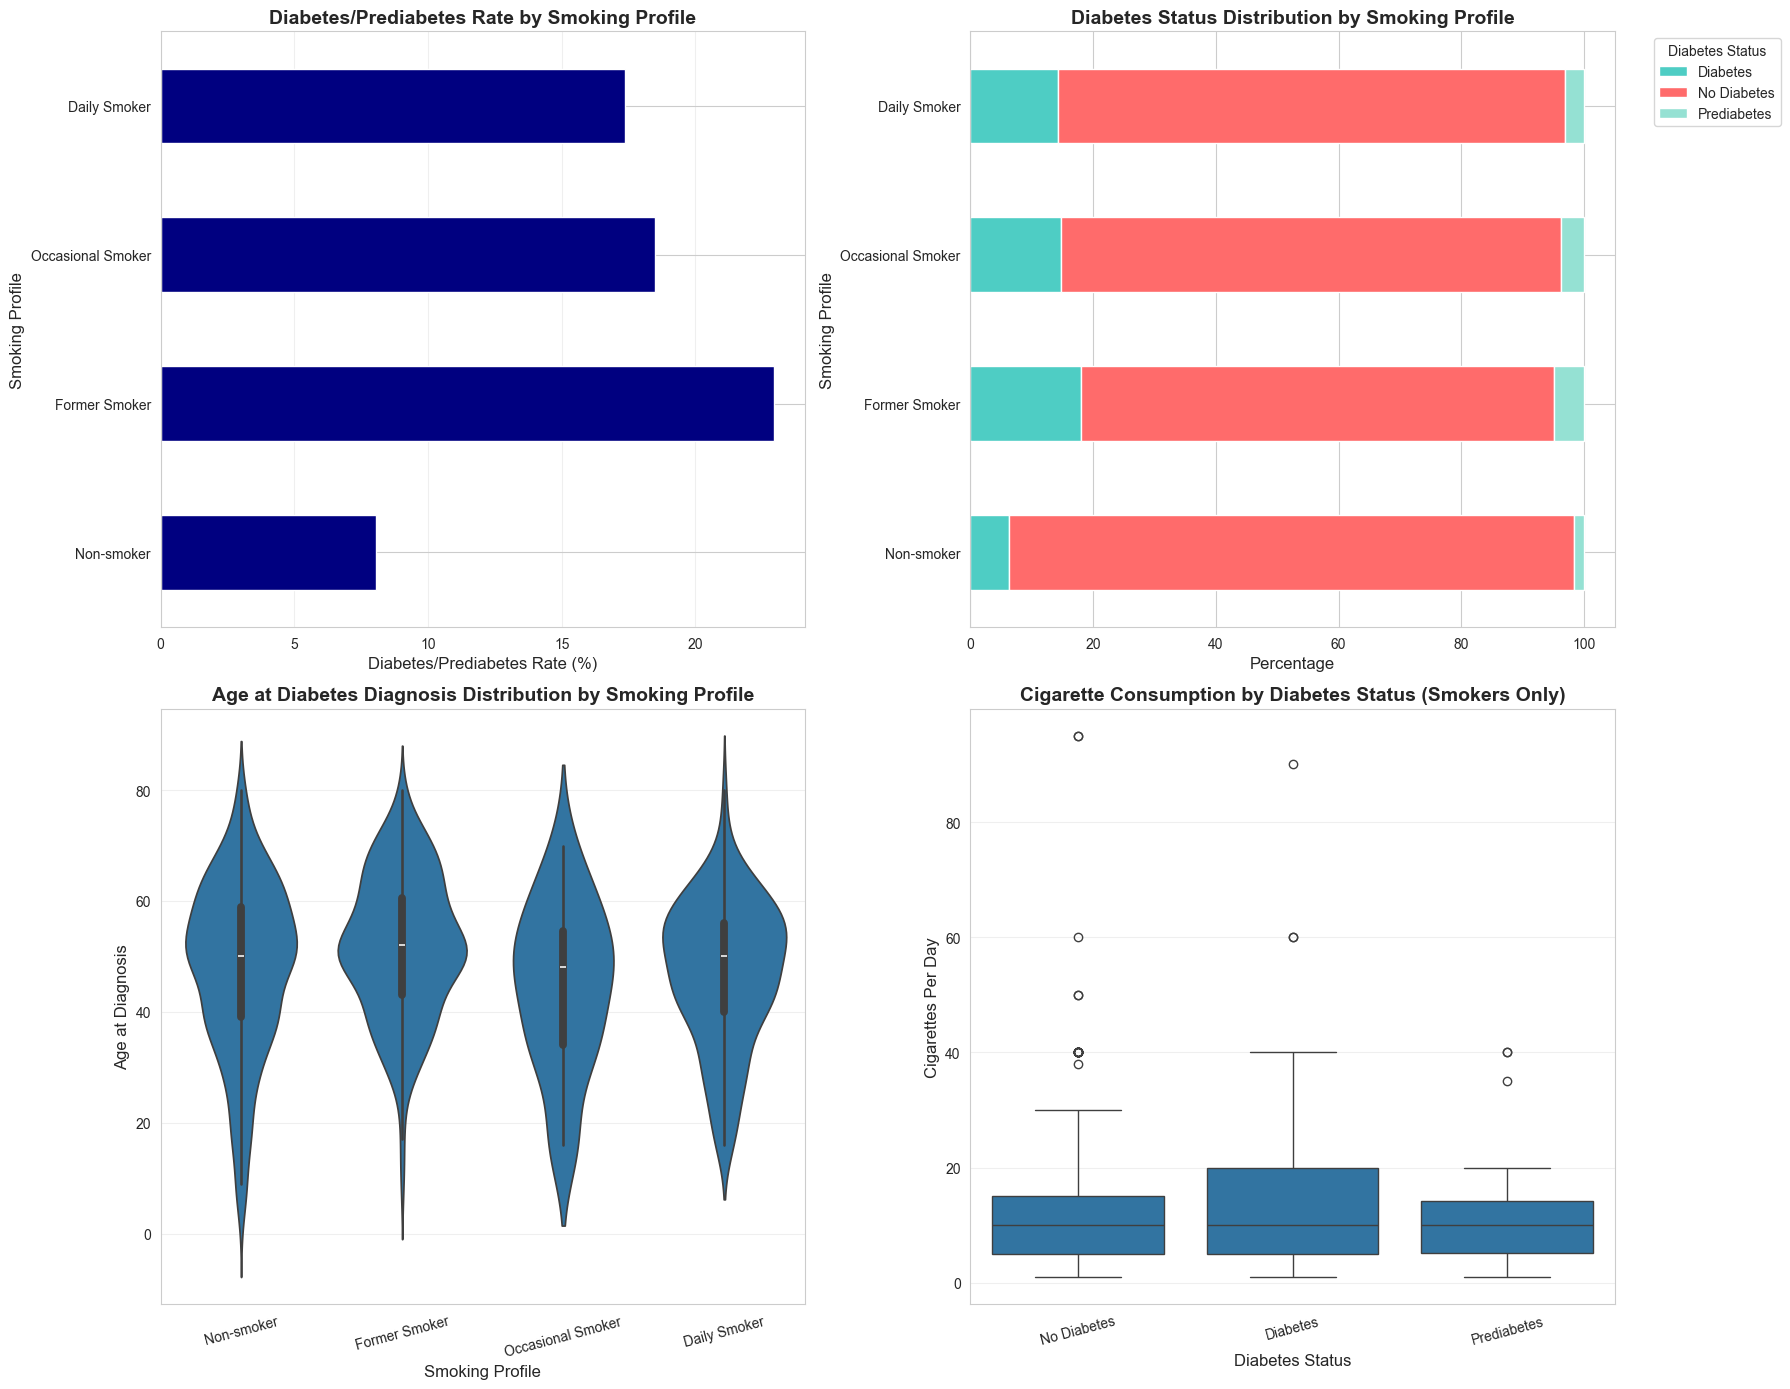


Summary: Diabetes Risk by Smoking Profile

Non-smoker:
  Total: 8494
  Diabetes/Prediabetes Rate: 8.06%
  Breakdown: {'No Diabetes': 7809, 'Diabetes': 540, 'Prediabetes': 145}

Former Smoker:
  Total: 2053
  Diabetes/Prediabetes Rate: 22.94%
  Breakdown: {'No Diabetes': 1582, 'Diabetes': 370, 'Prediabetes': 101}

Occasional Smoker:
  Total: 238
  Diabetes/Prediabetes Rate: 18.49%
  Breakdown: {'No Diabetes': 194, 'Diabetes': 35, 'Prediabetes': 9}

Daily Smoker:
  Total: 951
  Diabetes/Prediabetes Rate: 17.35%
  Breakdown: {'No Diabetes': 786, 'Diabetes': 136, 'Prediabetes': 29}


In [ ]:
# EDA 8: Multi-factor Analysis - Smoking Patterns and Diabetes Risk
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Create comprehensive smoking profile
df['Smoking_Profile'] = 'Non-smoker'
df.loc[(df['Ever_Smoked_100'] == 'Yes') & (df['Current_Smoking'] == 'Not at all'), 'Smoking_Profile'] = 'Former Smoker'
df.loc[(df['Ever_Smoked_100'] == 'Yes') & (df['Current_Smoking'] == 'Some days'), 'Smoking_Profile'] = 'Occasional Smoker'
df.loc[(df['Ever_Smoked_100'] == 'Yes') & (df['Current_Smoking'] == 'Every day'), 'Smoking_Profile'] = 'Daily Smoker'

df_profile = df[df['Smoking_Profile'].notna() & df['Diabetes_Status'].notna()].copy()

# Plot 1: Diabetes rate by smoking profile
if len(df_profile) > 0:
    diab_by_profile = df_profile.groupby('Smoking_Profile')['Diabetes_Status'].apply(
        lambda x: (x.isin(['Diabetes', 'Prediabetes']).sum() / len(x) * 100) if len(x) > 0 else 0
    ).reindex(['Non-smoker', 'Former Smoker', 'Occasional Smoker', 'Daily Smoker'])
    
    diab_by_profile.plot(kind='barh', ax=axes[0,0], color='navy')
    axes[0,0].set_title('Diabetes/Prediabetes Rate by Smoking Profile', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Diabetes/Prediabetes Rate (%)', fontsize=12)
    axes[0,0].set_ylabel('Smoking Profile', fontsize=12)
    axes[0,0].grid(axis='x', alpha=0.3)

# Plot 2: Stacked bar - Diabetes status by smoking profile
if len(df_profile) > 0:
    profile_diab_cross = pd.crosstab(df_profile['Smoking_Profile'], df_profile['Diabetes_Status'], 
                                      normalize='index') * 100
    profile_diab_cross = profile_diab_cross.reindex(['Non-smoker', 'Former Smoker', 'Occasional Smoker', 'Daily Smoker'])
    profile_diab_cross.plot(kind='barh', stacked=True, ax=axes[0,1], 
                            color=['#4ecdc4', '#ff6b6b', '#95e1d3'])
    axes[0,1].set_title('Diabetes Status Distribution by Smoking Profile', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Percentage', fontsize=12)
    axes[0,1].set_ylabel('Smoking Profile', fontsize=12)
    axes[0,1].legend(title='Diabetes Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Age at diagnosis distribution by smoking profile
df_diag_age = df_profile[(df_profile['EverTold_Diabetes'] == 1) & 
                         (df_profile['Age_DiabetesDiagnosis'].notna())].copy()
if len(df_diag_age) > 0:
    sns.violinplot(data=df_diag_age, x='Smoking_Profile', y='Age_DiabetesDiagnosis', 
                   ax=axes[1,0], order=['Non-smoker', 'Former Smoker', 'Occasional Smoker', 'Daily Smoker'])
    axes[1,0].set_title('Age at Diabetes Diagnosis Distribution by Smoking Profile', 
                        fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Smoking Profile', fontsize=12)
    axes[1,0].set_ylabel('Age at Diagnosis', fontsize=12)
    axes[1,0].tick_params(axis='x', rotation=15)
    axes[1,0].grid(axis='y', alpha=0.3)

# Plot 4: Cigarette consumption by diabetes status (for smokers only)
df_smokers_cons = df_profile[(df_profile['Smoking_Profile'] != 'Non-smoker') & 
                              (df_profile['Cigarettes_Per_Day'].notna()) &
                              (df_profile['Diabetes_Status'].notna())].copy()
if len(df_smokers_cons) > 0:
    sns.boxplot(data=df_smokers_cons, x='Diabetes_Status', y='Cigarettes_Per_Day', ax=axes[1,1])
    axes[1,1].set_title('Cigarette Consumption by Diabetes Status (Smokers Only)', 
                        fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Diabetes Status', fontsize=12)
    axes[1,1].set_ylabel('Cigarettes Per Day', fontsize=12)
    axes[1,1].tick_params(axis='x', rotation=15)
    axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("Summary: Diabetes Risk by Smoking Profile")
print("="*60)
if len(df_profile) > 0:
    for profile in ['Non-smoker', 'Former Smoker', 'Occasional Smoker', 'Daily Smoker']:
        profile_df = df_profile[df_profile['Smoking_Profile'] == profile]
        if len(profile_df) > 0:
            diab_rate = (profile_df['Diabetes_Status'].isin(['Diabetes', 'Prediabetes']).sum() / 
                        len(profile_df) * 100)
            print(f"\n{profile}:")
            print(f"  Total: {len(profile_df)}")
            print(f"  Diabetes/Prediabetes Rate: {diab_rate:.2f}%")
            print(f"  Breakdown: {profile_df['Diabetes_Status'].value_counts().to_dict()}")


# Machine Learning Baseline: Predicting Diabetes Risk

## Objective
Build baseline models to predict diabetes risk using smoking-related features.

## Steps:
1. **Data Preparation**: Create features and target variable
2. **Choose Evaluation Metrics**: Select appropriate metrics for imbalanced classification
3. **Baseline Models**: Start with simple models
4. **Model Comparison**: Compare performance across different algorithms


In [ ]:
# Step 1: Data Preparation for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("STEP 1: DATA PREPARATION")
print("="*70)

# Create target variable: Diabetes (1) vs No Diabetes (0)
# We'll combine Diabetes and Prediabetes as positive class (1)
df['Target_Diabetes'] = 0
df.loc[df['EverTold_Diabetes'].isin([1, 3]), 'Target_Diabetes'] = 1  # Diabetes or Prediabetes = 1

print(f"\nTarget variable distribution:")
print(df['Target_Diabetes'].value_counts())
print(f"\nDiabetes/Prediabetes rate: {df['Target_Diabetes'].mean()*100:.2f}%")

# Select features related to smoking that might predict diabetes
feature_cols = [
    # Smoking history
    'SmokedAtLeast100CigarettesInLife',  # Ever smoked 100+ cigarettes
    'CurrentCigaretteSmoking',            # Current smoking frequency
    'FirstCigaretteAge',                  # Age when started smoking
    'CigarettesPerDayOnSmokingDays_30Days',  # Cigarettes per day
    'CigarettesSmokedDays_30Days',       # Days smoked in last 30 days
    
    # Household exposure
    'NumberOfPeopleSmokingInHome',       # Household smokers
    'NumberOfPeopleSmokingInsideHome',    # Indoor smokers
    
    # Recent tobacco use
    'UsedAnyTobaccoProduct_5Days',       # Any tobacco in last 5 days
    'DaysSmokedCigarettes_5Days',         # Days smoked in last 5 days
    'CigarettesSmokedPerSmokingDay_5Days',  # Cigarettes per day (5 days)
    'UsedECigarettes_5Days',             # E-cigarette use
    'UsedSmokelessTobacco_5Days',        # Smokeless tobacco
    
    # Additional diabetes-related features
    'EverTold_Prediabetes',              # Prediabetes history
    'BloodSugarTest_Last3Years'          # Recent blood sugar test
]

# Create feature matrix X and target vector y
X = df[feature_cols].copy()
y = df['Target_Diabetes'].copy()

print(f"\nInitial feature matrix shape: {X.shape}")
print(f"Features: {list(X.columns)}")

# Handle missing values - we'll use median for numeric and most_frequent for categorical
# First, identify numeric vs categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = []

print(f"\nNumeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# Impute missing values
numeric_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

print(f"\nMissing values after imputation: {X.isna().sum().sum()}")

# Remove rows where target is missing
valid_mask = y.notna()
X = X[valid_mask]
y = y[valid_mask]

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Final target distribution:")
print(y.value_counts())
print(f"Class balance: {y.mean()*100:.2f}% positive class")


STEP 1: DATA PREPARATION


NameError: name 'df' is not defined

In [ ]:
# Step 2: Train-Test Split and Choose Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt

print("="*70)
print("STEP 2: TRAIN-TEST SPLIT & EVALUATION METRICS")
print("="*70)

# Split data: 80% train, 20% test
# stratify=y ensures both sets have similar class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"Training set diabetes rate: {y_train.mean()*100:.2f}%")
print(f"\nTest set class distribution:")
print(y_test.value_counts())
print(f"Test set diabetes rate: {y_test.mean()*100:.2f}%")

print("\n" + "="*70)
print("WHY THESE METRICS?")
print("="*70)
print("""
For imbalanced classification problems (like diabetes prediction), we need multiple metrics:

1. **Accuracy**: Overall correctness, but can be misleading with imbalanced data
   - Formula: (TP + TN) / (TP + TN + FP + FN)
   - Problem: If 90% don't have diabetes, predicting "no diabetes" always gives 90% accuracy!

2. **Precision**: Of those predicted as diabetic, how many actually are?
   - Formula: TP / (TP + FP)
   - Important for: Minimizing false alarms

3. **Recall (Sensitivity)**: Of actual diabetics, how many did we catch?
   - Formula: TP / (TP + FN)
   - Important for: Not missing actual cases (medical screening!)

4. **F1-Score**: Harmonic mean of precision and recall
   - Formula: 2 * (Precision * Recall) / (Precision + Recall)
   - Balances precision and recall

5. **ROC-AUC**: Area under ROC curve - measures model's ability to distinguish classes
   - Range: 0.5 (random) to 1.0 (perfect)
   - Good for: Overall model performance comparison

For medical problems, RECALL is often most important - we want to catch all diabetics!
""")


In [ ]:
# Step 3: Baseline Model 1 - Dummy Classifier (Always Predict Majority Class)
from sklearn.dummy import DummyClassifier

print("="*70)
print("STEP 3: BASELINE MODEL 1 - DUMMY CLASSIFIER")
print("="*70)
print("""
WHAT IS A BASELINE?
A baseline is the simplest possible model. It helps us understand:
- What's the minimum performance we should beat?
- How much better are our actual models?

DUMMY CLASSIFIER:
This model always predicts the most frequent class (majority class).
If 85% of people don't have diabetes, it predicts "no diabetes" 100% of the time.
""")

# Create and train dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_precision = precision_score(y_test, y_pred_dummy, zero_division=0)
dummy_recall = recall_score(y_test, y_pred_dummy, zero_division=0)
dummy_f1 = f1_score(y_test, y_pred_dummy, zero_division=0)

print(f"\nDummy Classifier Results:")
print(f"  Accuracy:  {dummy_accuracy:.4f} ({dummy_accuracy*100:.2f}%)")
print(f"  Precision: {dummy_precision:.4f}")
print(f"  Recall:    {dummy_recall:.4f}")
print(f"  F1-Score:  {dummy_f1:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dummy))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_dummy, target_names=['No Diabetes', 'Diabetes']))

# Store results for comparison
baseline_results = {
    'Dummy Classifier': {
        'Accuracy': dummy_accuracy,
        'Precision': dummy_precision,
        'Recall': dummy_recall,
        'F1-Score': dummy_f1,
        'ROC-AUC': None  # Can't calculate for dummy classifier
    }
}


In [ ]:
# Step 4: Baseline Model 2 - Logistic Regression
from sklearn.linear_model import LogisticRegression

print("="*70)
print("STEP 4: BASELINE MODEL 2 - LOGISTIC REGRESSION")
print("="*70)
print("""
LOGISTIC REGRESSION EXPLAINED:
- Simple, interpretable linear model
- Uses sigmoid function to output probabilities (0 to 1)
- Formula: P(diabetes) = 1 / (1 + e^(-z)) where z = b0 + b1*x1 + b2*x2 + ...
- Coefficients tell us: which features increase/decrease diabetes risk
- Fast to train, good baseline for binary classification

WHY START HERE?
1. Simple and fast
2. Provides interpretable coefficients
3. Works well as baseline before trying complex models
4. Handles imbalanced data with class_weight parameter
""")

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model
# class_weight='balanced' helps with imbalanced data
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',  # Automatically adjusts for class imbalance
    solver='lbfgs'  # Good solver for small-medium datasets
)

# Train the model
print("\nTraining Logistic Regression...")
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nLogistic Regression Results:")
print(f"  Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")
print(f"  ROC-AUC:   {lr_roc_auc:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Diabetes', 'Diabetes']))

# Feature importance (coefficients)
print(f"\nTop 10 Most Important Features (by absolute coefficient):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print(feature_importance.head(10))

# Store results
baseline_results['Logistic Regression'] = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1,
    'ROC-AUC': lr_roc_auc
}


In [ ]:
# Step 5: Baseline Model 3 - Naive Bayes
from sklearn.naive_bayes import GaussianNB

print("="*70)
print("STEP 5: BASELINE MODEL 3 - NAIVE BAYES")
print("="*70)
print("""
NAIVE BAYES EXPLAINED:
- Based on Bayes' Theorem: P(A|B) = P(B|A) * P(A) / P(B)
- "Naive" because it assumes features are independent (not always true!)
- Formula: P(diabetes|features) ∝ P(features|diabetes) * P(diabetes)
- Fast, simple, works well with small datasets
- Good for baseline comparison

WHY USE IT?
1. Very fast training and prediction
2. Works well with small datasets
3. Handles missing values naturally
4. Probabilistic output (like logistic regression)
""")

# Create Naive Bayes model
nb_clf = GaussianNB()

# Train the model
print("\nTraining Naive Bayes...")
nb_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_clf.predict(X_test_scaled)
y_pred_proba_nb = nb_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, y_pred_proba_nb)

print(f"\nNaive Bayes Results:")
print(f"  Accuracy:  {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"  Precision: {nb_precision:.4f}")
print(f"  Recall:    {nb_recall:.4f}")
print(f"  F1-Score:  {nb_f1:.4f}")
print(f"  ROC-AUC:   {nb_roc_auc:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['No Diabetes', 'Diabetes']))

# Store results
baseline_results['Naive Bayes'] = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1-Score': nb_f1,
    'ROC-AUC': nb_roc_auc
}


In [ ]:
# Step 6: Baseline Model 4 - Decision Tree
from sklearn.tree import DecisionTreeClassifier

print("="*70)
print("STEP 6: BASELINE MODEL 4 - DECISION TREE")
print("="*70)
print("""
DECISION TREE EXPLAINED:
- Tree-like model that splits data based on feature values
- Each node asks a question (e.g., "Did you smoke 100+ cigarettes?")
- Branches lead to decisions (Yes/No)
- Leaf nodes give final prediction
- Very interpretable - you can visualize the tree!

WHY USE IT?
1. Highly interpretable (can see decision rules)
2. No need for feature scaling
3. Handles non-linear relationships
4. Can show which features matter most
""")

# Create Decision Tree model
# max_depth limits tree complexity to prevent overfitting
dt_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit depth to prevent overfitting
    class_weight='balanced',
    min_samples_split=20,  # Minimum samples to split a node
    min_samples_leaf=10    # Minimum samples in a leaf
)

# Train the model
print("\nTraining Decision Tree...")
dt_clf.fit(X_train, y_train)  # No scaling needed for trees!

# Make predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

print(f"\nDecision Tree Results:")
print(f"  Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"  Precision: {dt_precision:.4f}")
print(f"  Recall:    {dt_recall:.4f}")
print(f"  F1-Score:  {dt_f1:.4f}")
print(f"  ROC-AUC:   {dt_roc_auc:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Diabetes', 'Diabetes']))

# Feature importance
print(f"\nTop 10 Most Important Features:")
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_clf.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance_dt.head(10))

# Store results
baseline_results['Decision Tree'] = {
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1-Score': dt_f1,
    'ROC-AUC': dt_roc_auc
}


In [ ]:
# Step 7: Compare All Baseline Models
print("="*70)
print("STEP 7: BASELINE MODEL COMPARISON")
print("="*70)

# Create comparison DataFrame
comparison_df = pd.DataFrame(baseline_results).T
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df.round(4))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Accuracy comparison
comparison_df['Accuracy'].plot(kind='barh', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Accuracy', fontsize=12)
axes[0,0].grid(axis='x', alpha=0.3)

# Plot 2: Precision vs Recall
axes[0,1].scatter(comparison_df['Precision'], comparison_df['Recall'], 
                  s=200, alpha=0.6, c=['red', 'blue', 'green', 'orange'])
for idx, model in enumerate(comparison_df.index):
    axes[0,1].annotate(model, 
                      (comparison_df['Precision'].iloc[idx], 
                       comparison_df['Recall'].iloc[idx]),
                      fontsize=10)
axes[0,1].set_title('Precision vs Recall', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Precision', fontsize=12)
axes[0,1].set_ylabel('Recall', fontsize=12)
axes[0,1].grid(alpha=0.3)

# Plot 3: F1-Score comparison
comparison_df['F1-Score'].plot(kind='barh', ax=axes[1,0], color='coral')
axes[1,0].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('F1-Score', fontsize=12)
axes[1,0].grid(axis='x', alpha=0.3)

# Plot 4: ROC-AUC comparison (excluding dummy classifier)
roc_comparison = comparison_df[comparison_df['ROC-AUC'].notna()]
roc_comparison['ROC-AUC'].plot(kind='barh', ax=axes[1,1], color='teal')
axes[1,1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('ROC-AUC', fontsize=12)
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ROC Curves
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC curves for all models
if y_pred_proba_lr is not None:
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
    ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_roc_auc:.3f})', linewidth=2)

if y_pred_proba_nb is not None:
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
    ax.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC={nb_roc_auc:.3f})', linewidth=2)

if y_pred_proba_dt is not None:
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
    ax.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={dt_roc_auc:.3f})', linewidth=2)

# Diagonal line (random classifier)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC=0.5)', linewidth=1)

ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=12)
ax.set_title('ROC Curves: Baseline Models Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY INSIGHTS:")
print("="*70)
print(f"""
1. Best F1-Score: {comparison_df.index[0]} ({comparison_df['F1-Score'].iloc[0]:.4f})
2. Best Recall: {comparison_df.loc[comparison_df['Recall'].idxmax()].name} ({comparison_df['Recall'].max():.4f})
   - Important for medical screening - we want to catch all diabetics!
3. Best Precision: {comparison_df.loc[comparison_df['Precision'].idxmax()].name} ({comparison_df['Precision'].max():.4f})
   - Important to minimize false alarms
4. Best ROC-AUC: {roc_comparison.loc[roc_comparison['ROC-AUC'].idxmax()].name} ({roc_comparison['ROC-AUC'].max():.4f})
   - Overall model discrimination ability

NEXT STEPS:
- Try more complex models (Random Forest, XGBoost, Neural Networks)
- Feature engineering (create new features from existing ones)
- Hyperparameter tuning (optimize model parameters)
- Cross-validation (more robust evaluation)
""")


In [ ]:
# Step 8: Statistical Analysis - Understanding Relationships
from scipy import stats
from scipy.stats import chi2_contingency

print("="*70)
print("STEP 8: STATISTICAL ANALYSIS")
print("="*70)
print("""
STATISTICAL TESTS HELP US UNDERSTAND:
- Which features are significantly associated with diabetes?
- Are relationships statistically significant or just random?
- How strong are the associations?

WE'LL USE:
1. Chi-square test: For categorical features vs diabetes
2. T-test: For continuous features vs diabetes
3. Correlation analysis: Relationships between features
""")

# Statistical test 1: Chi-square for categorical features
print("\n" + "-"*70)
print("CHI-SQUARE TESTS (Categorical Features vs Diabetes)")
print("-"*70)

categorical_features = [
    'SmokedAtLeast100CigarettesInLife',
    'CurrentCigaretteSmoking',
    'UsedAnyTobaccoProduct_5Days',
    'UsedECigarettes_5Days',
    'EverTold_Prediabetes'
]

for feature in categorical_features:
    if feature in X.columns:
        # Create contingency table
        contingency = pd.crosstab(df[feature], df['Target_Diabetes'])
        
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency)
        
        print(f"\n{feature}:")
        print(f"  Chi-square statistic: {chi2:.4f}")
        print(f"  P-value: {p_value:.6f}")
        print(f"  Significant? {'Yes' if p_value < 0.05 else 'No'} (p < 0.05)")
        print(f"  Contingency table:")
        print(contingency)

# Statistical test 2: T-test for continuous features
print("\n" + "-"*70)
print("T-TESTS (Continuous Features: Diabetics vs Non-Diabetics)")
print("-"*70)

continuous_features = [
    'FirstCigaretteAge',
    'CigarettesPerDayOnSmokingDays_30Days',
    'CigarettesSmokedDays_30Days',
    'NumberOfPeopleSmokingInHome',
    'DaysSmokedCigarettes_5Days'
]

for feature in continuous_features:
    if feature in X.columns:
        # Split into diabetics and non-diabetics
        diabetics = df[df['Target_Diabetes'] == 1][feature].dropna()
        non_diabetics = df[df['Target_Diabetes'] == 0][feature].dropna()
        
        if len(diabetics) > 0 and len(non_diabetics) > 0:
            # Perform t-test
            t_stat, p_value = stats.ttest_ind(diabetics, non_diabetics)
            
            print(f"\n{feature}:")
            print(f"  Diabetics mean: {diabetics.mean():.2f} (n={len(diabetics)})")
            print(f"  Non-diabetics mean: {non_diabetics.mean():.2f} (n={len(non_diabetics)})")
            print(f"  T-statistic: {t_stat:.4f}")
            print(f"  P-value: {p_value:.6f}")
            print(f"  Significant difference? {'Yes' if p_value < 0.05 else 'No'} (p < 0.05)")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("""
- P-value < 0.05: Statistically significant relationship (not due to chance)
- Lower p-value = stronger evidence of relationship
- These tests help validate which features should be in our model
""")
